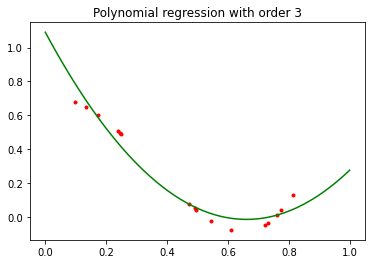

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#load the data set
data = loadtxt('polynome.data')

#shuffle the data so the split doesn't depend on input data order
# np.random.shuffle(data)

#separate imput from output
X = data[:, 0]
Y = data[:, 1]

N = len(X)

def visualize(w):
  plt.plot(X, Y, 'r.')

  #plot the fitte curve
  x = linspace(0, 1, 100)
  y = polyval(w, x)
  plt.plot(x, y, 'g-')
  plt.title('Polynomial regression with order ' + str(len(w - 1)))
  plt.show()

#Apply polynomial regression of order 2 on the data
w = polyfit(X, Y, 2)
visualize(w)

The polynome should have an order 3 to fit the data properly.

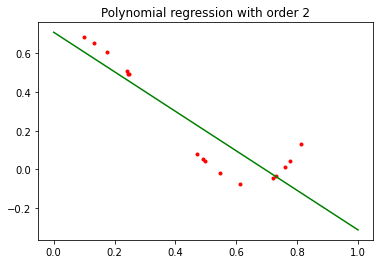

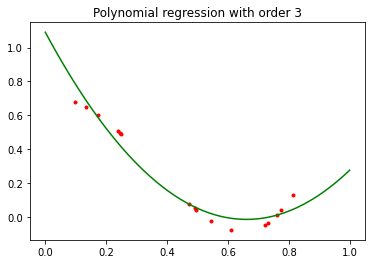

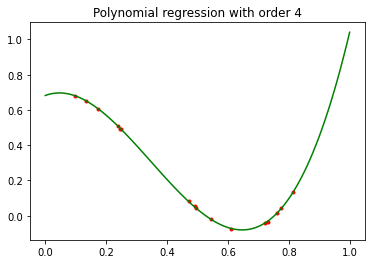

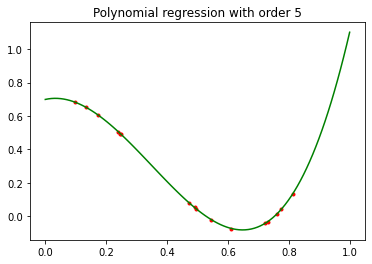

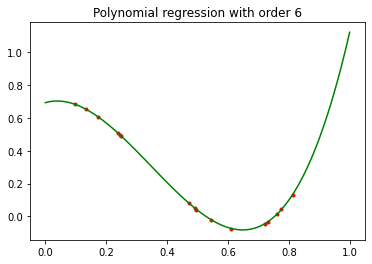

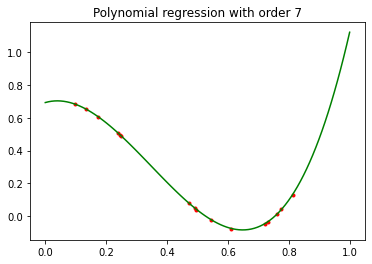

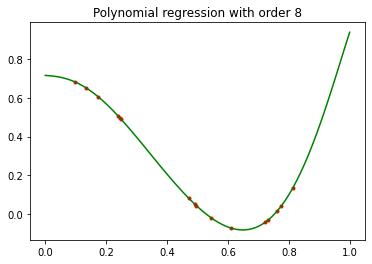

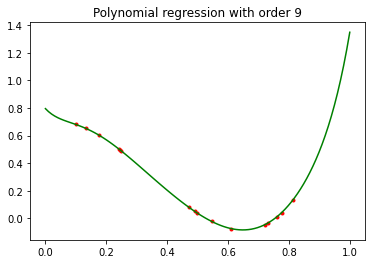

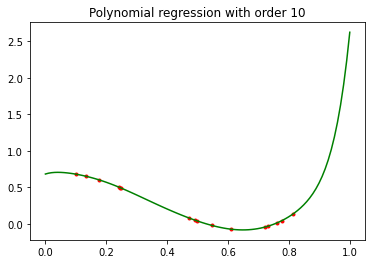

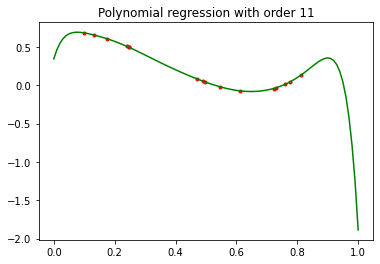

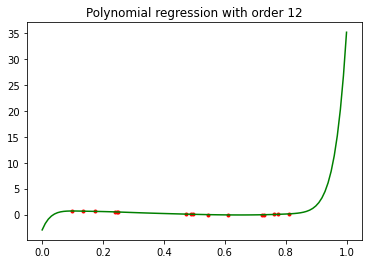

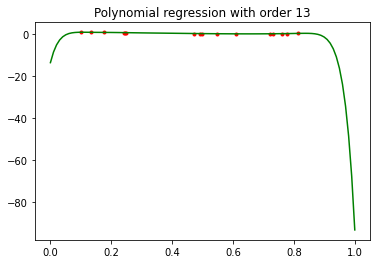

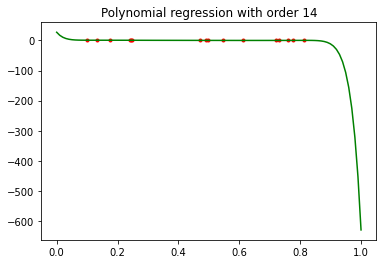

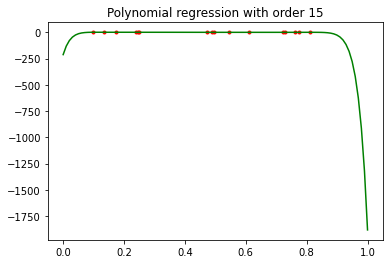

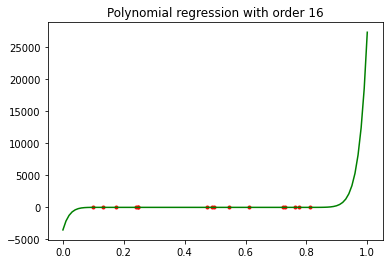

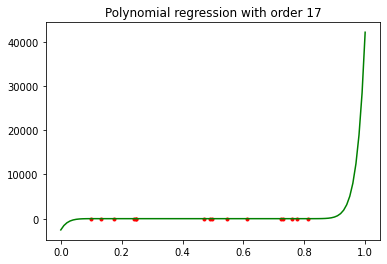

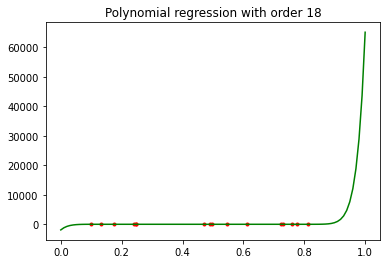

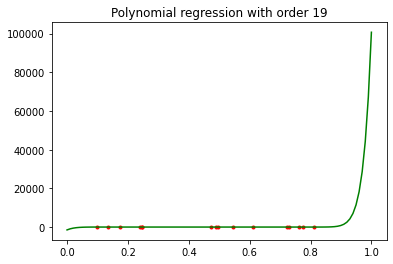

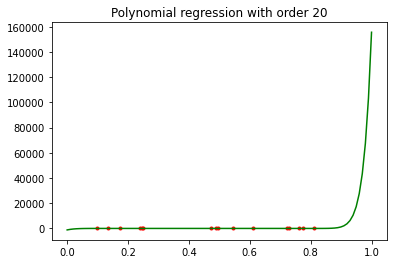

In [ ]:
for deg in range(1, 20):
  w = polyfit(X, Y, deg)
  visualize(w)

From the plotted graphs above, we can see that the data has a good fit from deg = 4

In [ ]:
#Mean Squared Error
def mse_func(X, Y, w):
  mse = 0
  
  ypred = polyval(w, X)
  mse = np.sum((np.subtract(Y, ypred)**2))


  return mse/len(Y)

mse_func(X, Y, w)

1.0391631297759374e-15

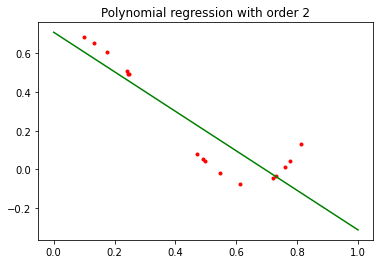

Mean Squared Error : 0.014652890071799372


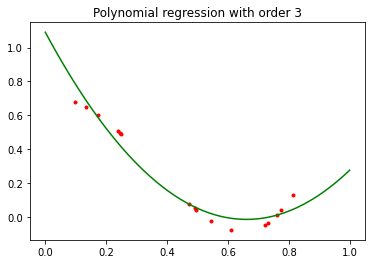

Mean Squared Error : 0.0028454931674710103


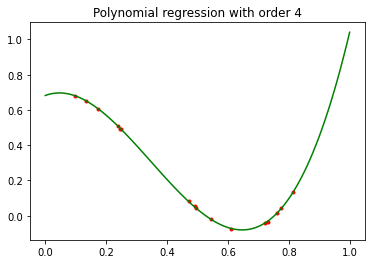

Mean Squared Error : 2.921920290709196e-06


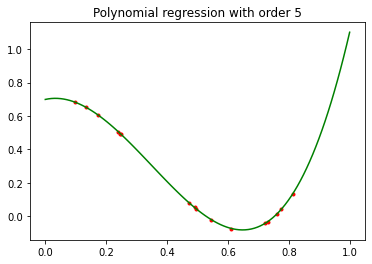

Mean Squared Error : 5.868904715291749e-07


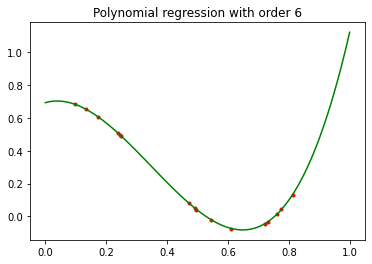

Mean Squared Error : 5.490678952884594e-07


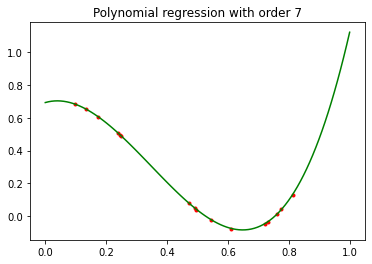

Mean Squared Error : 5.490141341900054e-07


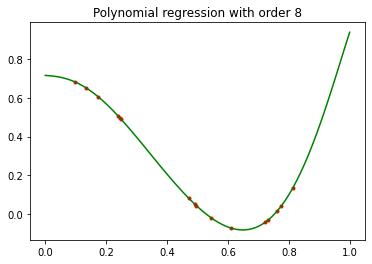

Mean Squared Error : 5.169742908129638e-07


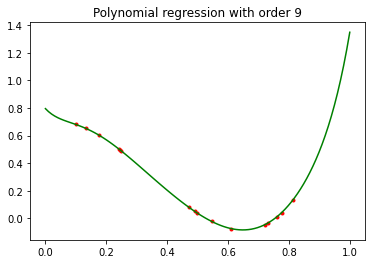

Mean Squared Error : 4.7630971336634363e-07


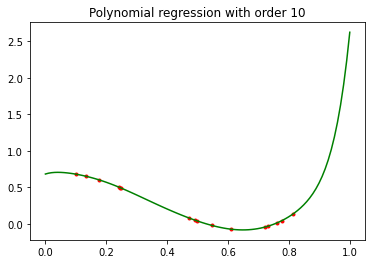

Mean Squared Error : 4.410793367680301e-07


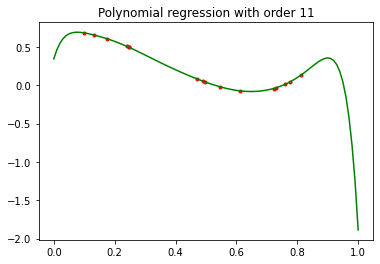

Mean Squared Error : 4.32134806873272e-07


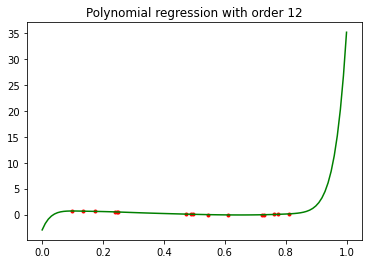

Mean Squared Error : 3.225250450167816e-07


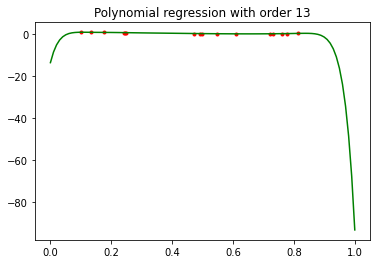

Mean Squared Error : 1.367693228335475e-07


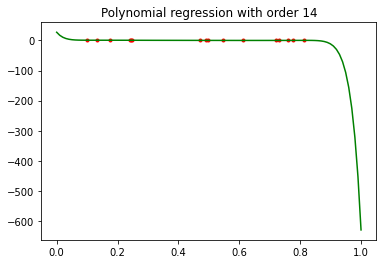

Mean Squared Error : 1.2002051731408935e-07


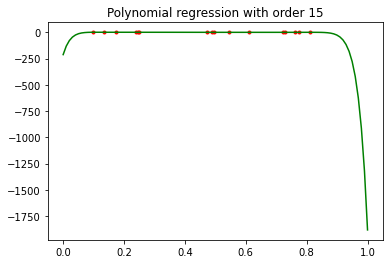

Mean Squared Error : 1.1492457901311505e-07


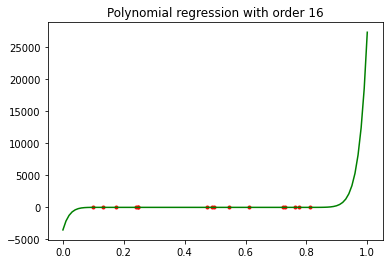

Mean Squared Error : 6.207986003889724e-11


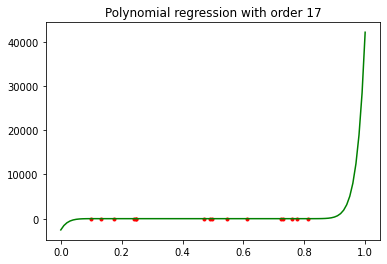

Mean Squared Error : 3.754184588386733e-13


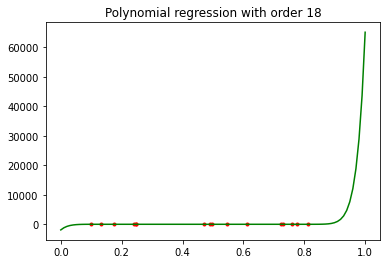

Mean Squared Error : 1.680320311591487e-13


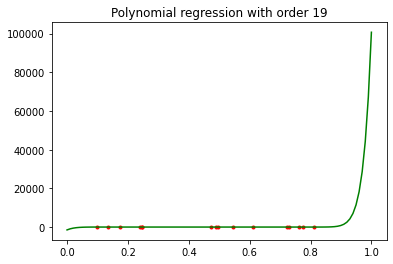

Mean Squared Error : 6.746978255085241e-15


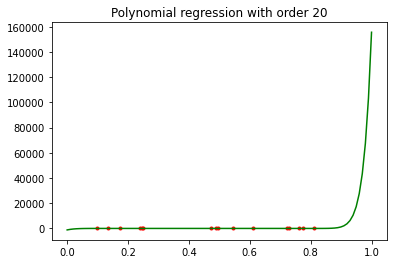

Mean Squared Error : 1.0391631297759374e-15


In [ ]:
for deg in range(1, 20):
  w = polyfit(X, Y, deg)
  visualize(w)
  print("Mean Squared Error : " + str(mse_func(X, Y, w)))

We can observe that the error decreases as the degree of the polynome increases. The risk we incur by taking the smallest error as sign of success if overfitting.
We can see in the graphs that the dataset is well fitted, but the hypothesis become more and more extreme as it leaves the known samples. This model will behave badly if new samples are added out of the bounds of the training set.

In [ ]:
#separate imput from output
X = data[:, 0]
Y = data[:, 1]

s_train, s_test = X[11:], X[:11] # len(X)=16 and 70%16≈11
y_train, y_test = Y[11:], Y[:11]

X, s_train, s_test, Y, y_train, y_test

(array([0.775828 , 0.760878 , 0.133132 , 0.496694 , 0.247747 , 0.722064 ,
        0.47177  , 0.812423 , 0.240243 , 0.24558  , 0.730303 , 0.0989795,
        0.174473 , 0.490375 , 0.611349 , 0.546044 ]),
 array([0.0989795, 0.174473 , 0.490375 , 0.611349 , 0.546044 ]),
 array([0.775828, 0.760878, 0.133132, 0.496694, 0.247747, 0.722064,
        0.47177 , 0.812423, 0.240243, 0.24558 , 0.730303]),
 array([ 0.0418957,  0.0126855,  0.652496 ,  0.0415206,  0.4914   ,
        -0.043826 ,  0.0805651,  0.132279 ,  0.506806 ,  0.494558 ,
        -0.0331938,  0.681641 ,  0.60485  ,  0.0521777, -0.0743674,
        -0.0204943]),
 array([ 0.681641 ,  0.60485  ,  0.0521777, -0.0743674, -0.0204943]),
 array([ 0.0418957,  0.0126855,  0.652496 ,  0.0415206,  0.4914   ,
        -0.043826 ,  0.0805651,  0.132279 ,  0.506806 ,  0.494558 ,
        -0.0331938]))

Best fit : 0.00019654439698702604


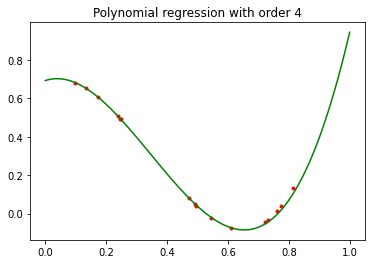

Worst fit : 189.36842943122699


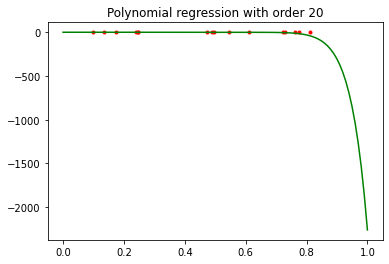

In [ ]:
import warnings
warnings.filterwarnings('ignore')
mse_list = []
for deg in range(1, 20):
  w = polyfit(s_train, y_train, deg)
  # visualize(w)
  mse_val = mse_func(s_test, y_test, w)
  # print(mse_val)
  mse_list.append([mse_val, w])

# convert the list to numpy array for indexing pruposes
mse_list = np.array(mse_list)
min_error = np.amin(mse_list[:, 0])
max_error = np.amax(mse_list[:, 0])

print("Best fit : " + str(min_error))
visualize(mse_list[np.where(mse_list[:,0] == min_error)][:, 1][0])
print("Worst fit : " + str(max_error))
visualize(mse_list[np.where(mse_list[:,0] == max_error)][:, 1][0])

The polynomial regression of order 4 seems to always be giving the best results. This is because the hypothesis fits the data better than the other ones (as proven by the MSE(test_data)).

Trying with K=2
Best fit : 1.068353070939503e-06


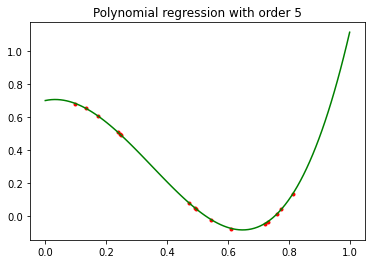

Trying with K=4
Best fit : 3.3685108128691336e-07


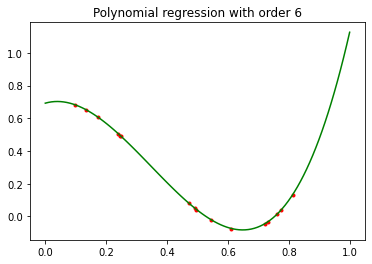

Trying with K=8
Best fit : 6.928724097876308e-09


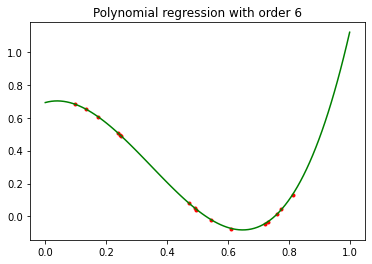

Trying with K=16
Best fit : 1.1914669594929434e-08


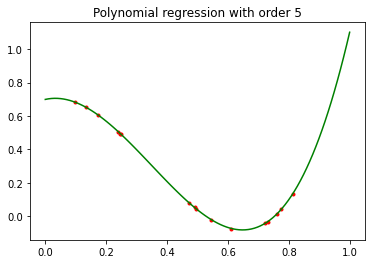

In [ ]:
def kfold(data, k=2):
  klen = int(len(data)/k) #size of a partition
  mean_mse_list = []
  #iterate over each degree
  for deg in range(1, 20):
    mse_sum = 0
    w_values = []
    #iterate over each k split
    for kcpt in range(0, k):
      delta = int(klen*kcpt) #compute the offset relative to partition size
      test = data[delta:delta+klen, :] #select the range of indexes for test values
      train = np.delete(data, range(delta, delta+klen), axis=0) #remove test from train

      #we split x and y columns into standard sets
      s_test = test[:, 0]
      y_test = test[:, 1]
      s_train = train[:, 0]
      y_train = train[:, 1]
      
      w = polyfit(s_train, y_train, deg)
      
      mse_value = mse_func(s_test, y_test, w)
      mse_sum+= mse_value #add all the mse for each kfold combination

      w_values.append([mse_value, w]) #append current kfold mse value with corresponding weights
      
    mse_mean = mse_sum / k
    mean_mse_list.append([mse_mean, w_values]) #append mean MSE to the list of all MSEs

  # convert the list to numpy array for indexing pruposes
  mean_mse_list = np.array(mean_mse_list)

  #best score
  min_k_error = np.amin(mean_mse_list[:, 0])
  min_error = mean_mse_list[np.where(mean_mse_list[:,0] == min_k_error)][0][1]
  # convert the list (again) to numpy array for indexing pruposes
  min_error = np.array(min_error)
  min_error_deg2 = np.amin(min_error[:, 0])
  w_deg2 = min_error[np.where(min_error[:,0] == min_error_deg2)][:, 1][0]
  print("Best fit : " + str(min_error_deg2))
  visualize(w_deg2)

  # activate the section below to take a look at the worst score as well

  # #worst score
  # max_k_error = np.amax(mean_mse_list[:, 0])
  # max_error = mean_mse_list[np.where(mean_mse_list[:,0] == max_k_error)][0][1]
  # # convert the list (again) to numpy array for indexing pruposes
  # max_error = np.array(max_error)
  # max_error_deg2 = np.amax(max_error[:, 0])
  # w_deg2 = max_error[np.where(max_error[:,0] == max_error_deg2)][:, 1][0]
  # print("Worst fit : " + str(max_error_deg2))
  # visualize(w_deg2)

# As the number of samples is 16, the acceptable values are its divisors :  2, 4, 8, 16.
# K=1 is prohibited as it would mean splitting the test set into 1 set, where either training set = test_set, or test_set = all and training = nothing 
acceptable_folds = [2, 4, 8, 16]
for k in acceptable_folds:
  print('Trying with K='+str(k))
  kfold(data, k)




On the K=2 and K=16, we choose order5. On K=4 and K=8, we choose order 6. The plots show no visible difference between the order 5 and 6 hypothesis.
With the previous method (hold-out 30% of samples), we had a simpler solution (order 4), but the points were less well fitted, especially with x values around 0.8.

So, in conclusion, the polynome is at least one order higher with the k-fold method than with the hold-out one. Making a choice between the possible values of K is hard as the result is almost the same. The only way to choose a k value in this example would be to select the least expensive one (K=2) from a ressource perspective.

With more sparse samples and a bigger dataset, we could improve on these results. This dataset could be obtained by taking more measures, or by augmenting it (with interpolation?).